In [1]:
from collections import Counter
from functools import partial
from matplotlib import pyplot as plt
from numpy.random import randint
from statistics import mean, stdev
from time import process_time

from tests.schedulers.common.generate_jobs import (
    generate_feasible_jobs_uniform_distribution,
    generate_feasible_mi_jobs,
)

In [11]:
plt.rcParams['figure.figsize'] = [12, 6]

# 2-approximation algorithms comparison

In [3]:
from schedulers import (
    FlowDensityFirstScheduler,
    FlowIntervalScheduler,
    FlowScheduler,
    LinearProgrammingRoundedScheduler,
)
from schedulers.flow_scheduler import FlowMethod
from schedulers.linear_programming_scheduler import LinearProgrammingMethod

In [4]:
approx_eff_testcases = {}
approx_eff_n = list(range(5, 51, 5))

is_feasible = partial(FlowScheduler(FlowMethod.boykov_kolmogorov).process, max_concurrency=3)

for number_of_jobs in approx_eff_n:
    max_t = number_of_jobs * 4
    max_duration = max_t * 3 // number_of_jobs

    approx_eff_testcases[number_of_jobs] = [generate_feasible_jobs_uniform_distribution(
        number_of_jobs=number_of_jobs,
        max_t=max_t,
        length_range=(0, max_t),
        duration_range=(0, max_duration),
        is_feasible=is_feasible,
    ) for _ in range(5)]

In [5]:
edmonds_karp_t = []
shortest_augmenting_path_t = []
preflow_push_t = []
dinitz_t = []
boykov_kolmogorov_t = []
ford_fulkerson_t = []

edmonds_karp_scheduler = FlowScheduler(FlowMethod.edmonds_karp)
shortest_augmenting_path_scheduler = FlowScheduler(FlowMethod.shortest_augmenting_path)
preflow_push_scheduler = FlowScheduler(FlowMethod.preflow_push)
dinitz_scheduler = FlowScheduler(FlowMethod.dinitz)
boykov_kolmogorov_scheduler = FlowScheduler(FlowMethod.boykov_kolmogorov)
ford_fulkerson_scheduler = FlowScheduler(FlowMethod.ford_fulkerson)

for number_of_jobs, testcases in approx_eff_testcases.items():
    edmonds_karp_t.append(0)
    shortest_augmenting_path_t.append(0)
    preflow_push_t.append(0)
    dinitz_t.append(0)
    boykov_kolmogorov_t.append(0)
    ford_fulkerson_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        edmonds_karp_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        edmonds_karp_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        shortest_augmenting_path_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        shortest_augmenting_path_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        preflow_push_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        preflow_push_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        dinitz_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        dinitz_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        boykov_kolmogorov_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        boykov_kolmogorov_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        ford_fulkerson_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        ford_fulkerson_t[-1] += elapsed_time / len(testcases)

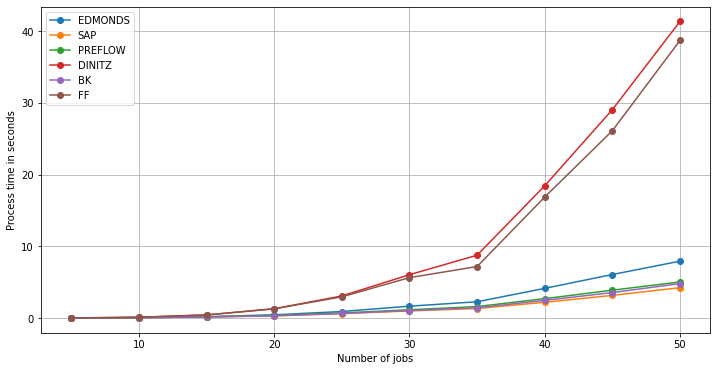

In [36]:
plt.plot(approx_eff_n, edmonds_karp_t, marker='o', label='EDMONDS')
plt.plot(approx_eff_n, shortest_augmenting_path_t, marker='o', label='SAP')
plt.plot(approx_eff_n, preflow_push_t, marker='o', label='PREFLOW')
plt.plot(approx_eff_n, dinitz_t, marker='o', label='DINITZ')
plt.plot(approx_eff_n, boykov_kolmogorov_t, marker='o', label='BK')
plt.plot(approx_eff_n, ford_fulkerson_t, marker='o', label='FF')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.show()

In [13]:
simplex_t = []
interior_point_t = []

simplex_scheduler = LinearProgrammingRoundedScheduler(LinearProgrammingMethod.revised_simplex)
interior_point_scheduler = LinearProgrammingRoundedScheduler(LinearProgrammingMethod.interior_point)

for number_of_jobs, testcases in approx_eff_testcases.items():
    simplex_t.append(0)
    interior_point_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        simplex_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        simplex_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        interior_point_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        interior_point_t[-1] += elapsed_time / len(testcases)

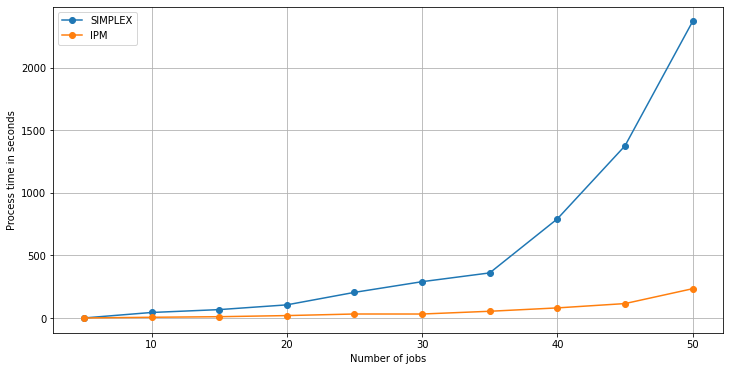

In [37]:
plt.plot(approx_eff_n, simplex_t, marker='o', label='SIMPLEX')
plt.plot(approx_eff_n, interior_point_t, marker='o', label='IPM')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.show()

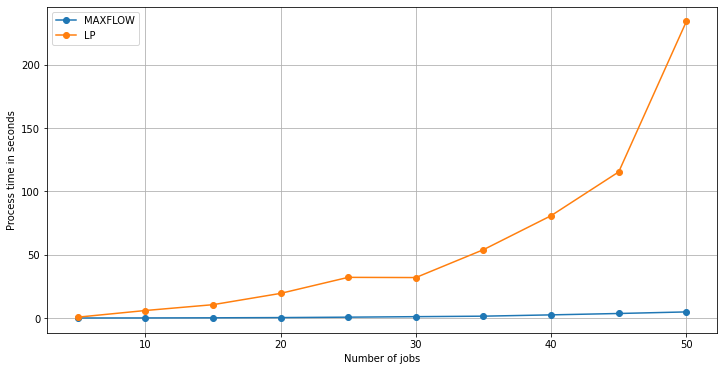

In [38]:
plt.plot(approx_eff_n, boykov_kolmogorov_t, marker='o', label='MAXFLOW')
plt.plot(approx_eff_n, interior_point_t, marker='o', label='LP')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.show()

In [16]:
boykov_kolmogorov_interval_t = []

boykov_kolmogorov_interval_scheduler = FlowIntervalScheduler(FlowMethod.boykov_kolmogorov)

for number_of_jobs, testcases in approx_eff_testcases.items():
    boykov_kolmogorov_interval_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        boykov_kolmogorov_interval_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        boykov_kolmogorov_interval_t[-1] += elapsed_time / len(testcases)

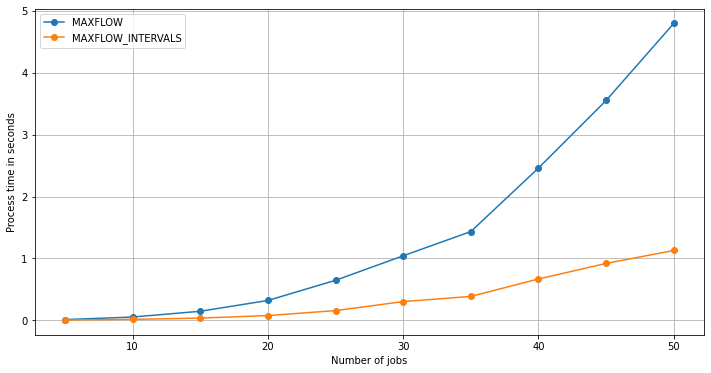

In [39]:
plt.plot(approx_eff_n, boykov_kolmogorov_t, marker='o', label='MAXFLOW')
plt.plot(approx_eff_n, boykov_kolmogorov_interval_t, marker='o', label='MAXFLOW_INTERVALS')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.show()

In [18]:
approx_accur_testcases = []

for _ in range(100):
    number_of_jobs = randint(5, 50)
    max_t = randint(10, 200)
    max_concurrency = randint(1, 5)
    max_duration = max_t * max_concurrency // number_of_jobs
    
    is_feasible = partial(FlowScheduler(FlowMethod.boykov_kolmogorov).process, max_concurrency=max_concurrency)
    
    approx_accur_testcases.append((max_concurrency, generate_feasible_jobs_uniform_distribution(
        number_of_jobs=number_of_jobs,
        max_t=max_t,
        length_range=(0, max_t),
        duration_range=(0, max_duration),
        is_feasible=is_feasible,
    )))

In [19]:
flow_ans = []
flow_density_first_ans = []
simplex_ans = []
interior_point_ans = []

flow_scheduler = FlowScheduler(FlowMethod.boykov_kolmogorov)
flow_density_first_scheduler = FlowDensityFirstScheduler(FlowMethod.boykov_kolmogorov)
simplex_scheduler = LinearProgrammingRoundedScheduler(LinearProgrammingMethod.highs_ds)
interior_point_scheduler = LinearProgrammingRoundedScheduler(LinearProgrammingMethod.highs_ipm)

for max_concurrency, testcase in approx_accur_testcases:
    schedule = flow_scheduler.process(testcase, max_concurrency=max_concurrency)
    flow_ans.append(sum(ti.duration for ti in schedule.active_time_intervals))
    
    schedule = flow_density_first_scheduler.process(testcase, max_concurrency=max_concurrency)
    flow_density_first_ans.append(sum(ti.duration for ti in schedule.active_time_intervals))
    
    schedule = simplex_scheduler.process(testcase, max_concurrency=max_concurrency)
    simplex_ans.append(sum(ti.duration for ti in schedule.active_time_intervals))
    
    schedule = interior_point_scheduler.process(testcase, max_concurrency=max_concurrency)
    interior_point_ans.append(sum(ti.duration for ti in schedule.active_time_intervals))

In [20]:
print(mean(flow_ans), stdev(flow_ans))
print(mean(flow_density_first_ans), stdev(flow_density_first_ans))
print(mean(simplex_ans), stdev(simplex_ans))
print(mean(interior_point_ans), stdev(interior_point_ans))

48.33 30.89802549998915
47.58 30.215782885001264
47.9 30.161685508725682
48.71 30.331266995886565


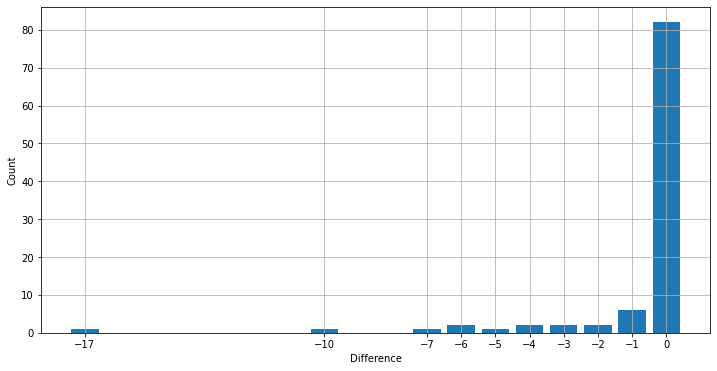

In [44]:
difference = Counter(
    flow_density_first_ans[i] - flow_ans[i] for i in range(len(approx_accur_testcases))
)

x = sorted(difference.keys())
y = [difference[key] for key in x]

plt.bar(x, y)

plt.xlabel('Difference')
plt.ylabel('Count')

plt.xticks(x)

plt.grid()
plt.show()

# Unit jobs algorithms comparison

In [22]:
from schedulers import UnitJobsSchedulerNLogN, UnitJobsSchedulerT

In [23]:
unit_eff_testcases = {}
unit_eff_t = list(range(500, 10001, 500))

is_feasible = partial(UnitJobsSchedulerT().process, max_concurrency=3)

for max_t in unit_eff_t:
    unit_eff_testcases[max_t] = [generate_feasible_jobs_uniform_distribution(
        number_of_jobs=100,
        max_t=max_t,
        length_range=(1, max_t),
        duration_range=(1, 1),
        is_feasible=is_feasible,
    ) for _ in range(5)]

In [24]:
unit_jobs_non_linear_t = []
unit_jobs_linear_t = []

unit_jobs_non_linear_scheduler = UnitJobsSchedulerNLogN()
unit_jobs_linear_scheduler = UnitJobsSchedulerT()

for max_t, testcases in unit_eff_testcases.items():
    unit_jobs_non_linear_t.append(0)
    unit_jobs_linear_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        unit_jobs_non_linear_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        unit_jobs_non_linear_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        unit_jobs_linear_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        unit_jobs_linear_t[-1] += elapsed_time / len(testcases)

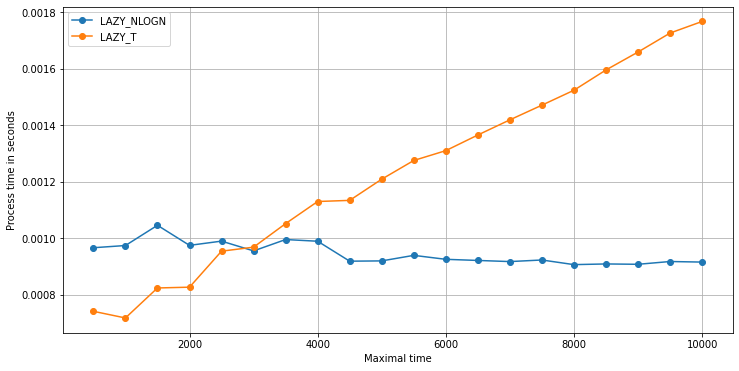

In [40]:
plt.plot(unit_eff_t, unit_jobs_non_linear_t, marker='o', label='LAZY_NLOGN')
plt.plot(unit_eff_t, unit_jobs_linear_t, marker='o', label='LAZY_T')

plt.legend()

plt.xlabel('Maximal time')
plt.ylabel('Process time in seconds')

plt.grid()
plt.show()

# Comparison of algorithms for B = 2

In [32]:
from schedulers import MatchingScheduler, UpperDegreeConstrainedSubgraphScheduler

In [33]:
matching_eff_testcases = {}
matching_eff_n = list(range(5, 51, 5))

is_feasible = MatchingScheduler().process

for number_of_jobs in matching_eff_n:
    max_t = number_of_jobs * 4
    
    matching_eff_testcases[number_of_jobs] = [generate_feasible_mi_jobs(
        number_of_jobs=number_of_jobs,
        max_t=max_t,
        p_range=(0, 1),
        max_duration=1,
        is_feasible=is_feasible,
    ) for _ in range(5)]

In [34]:
matching_t = []
udcs_scheduler_t = []

matching_scheduler = MatchingScheduler()
udcs_scheduler = UpperDegreeConstrainedSubgraphScheduler()

for number_of_jobs, testcases in matching_eff_testcases.items():
    matching_t.append(0)
    udcs_scheduler_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        matching_scheduler.process(testcase)
        elapsed_time = process_time() - start_time
        matching_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        udcs_scheduler.process(testcase)
        elapsed_time = process_time() - start_time
        udcs_scheduler_t[-1] += elapsed_time / len(testcases)

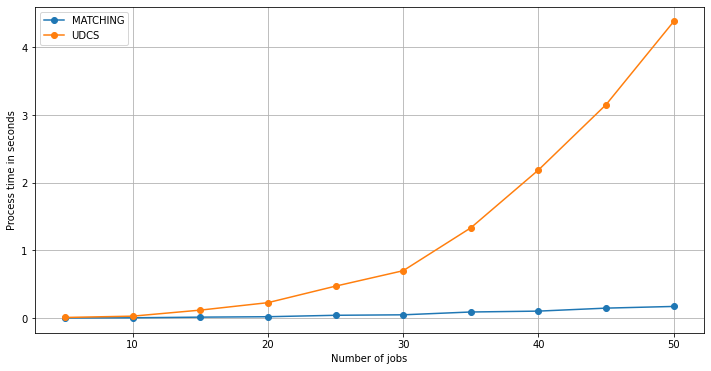

In [41]:
plt.plot(matching_eff_n, matching_t, marker='o', label='MATCHING')
plt.plot(matching_eff_n, udcs_scheduler_t, marker='o', label='UDCS')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.show()